# Importing Libraries

In [70]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL.Image
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading DataSet

In [92]:
training_dir = './archive/train/'
validation_dir = './archive/val/'
test_dir = './archive/test/'

batch_size = 32
img_height = 256
img_width = 256

train_ds = tf.keras.utils.image_dataset_from_directory(training_dir,image_size=(img_height, img_width),batch_size=batch_size)

validation_ds = tf.keras.utils.image_dataset_from_directory(validation_dir,image_size=(img_height, img_width),batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory( test_dir, image_size=(img_height, img_width),batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 625 files belonging to 2 classes.


In [93]:
class_names = train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


# Data Visualizing

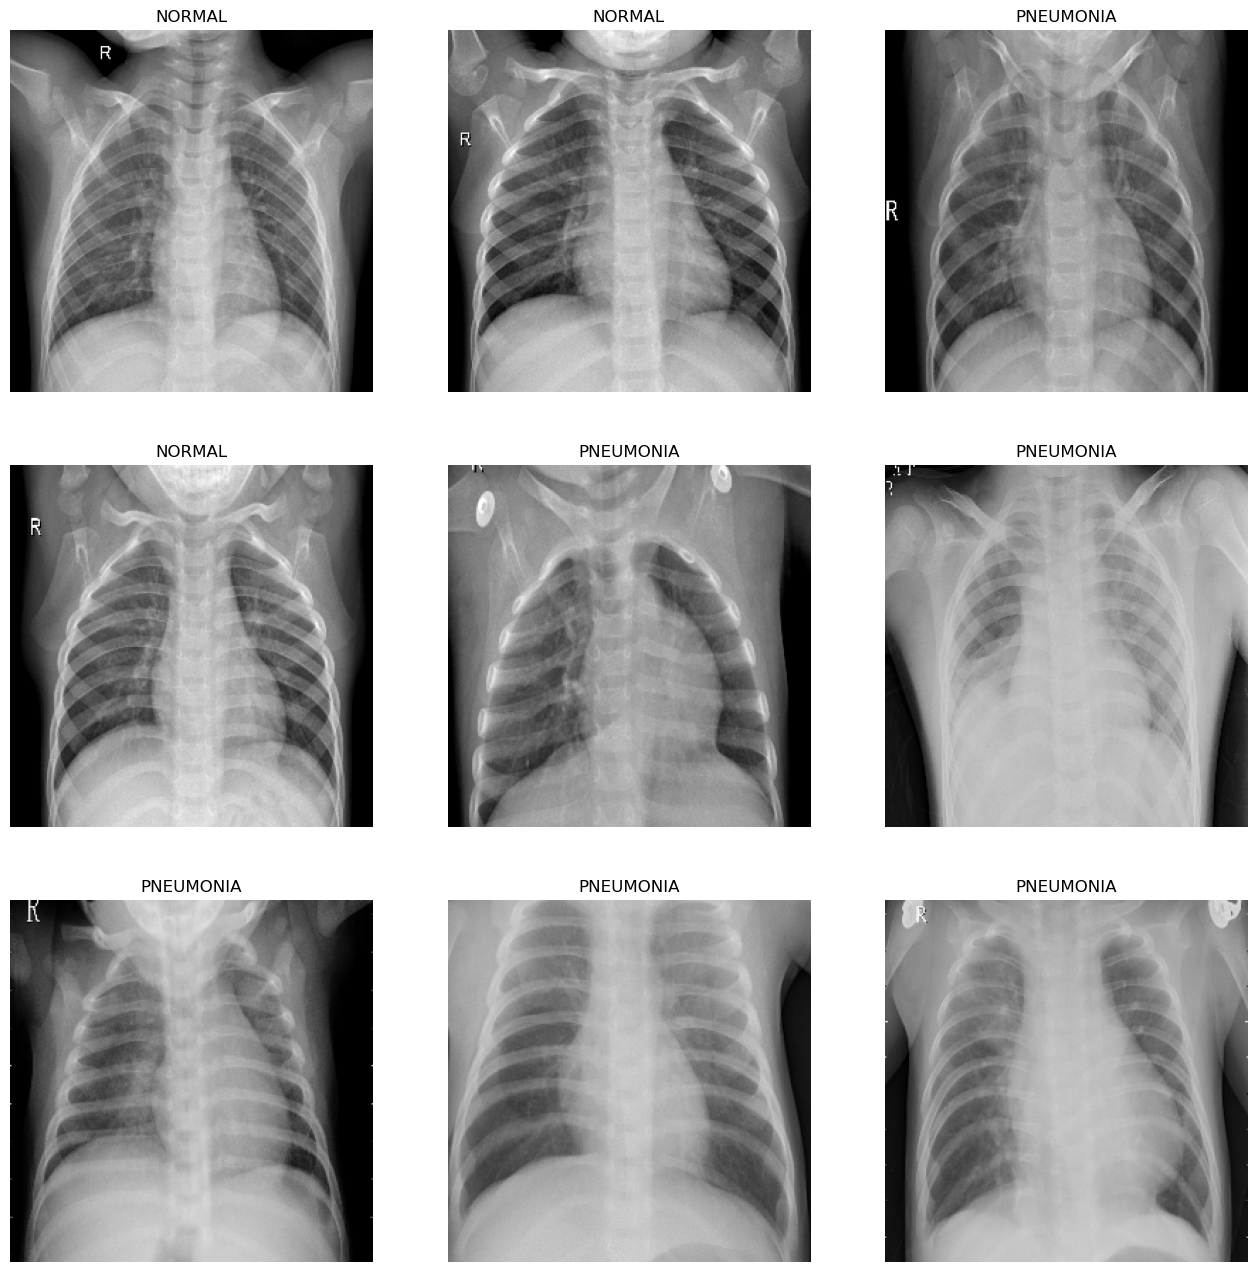

In [94]:
plt.figure(figsize=(16, 16))  
for images, labels in train_ds.take(1):  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)  
    plt.imshow(images[i].numpy().astype("uint8"))  
    plt.title(class_names[labels[i]])  
    plt.axis("off")

In [95]:
for image_batch, labels_batch in train_ds:
    print(f'The size of one image batch: {image_batch.shape}')
    print(f'The size of labels batch: {labels_batch.shape}')
    break

The size of one image batch: (32, 256, 256, 3)
The size of labels batch: (32,)


# Rescaling Data

In [96]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [97]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# CNN Architecture

In [98]:
model = tf.keras.Sequential([
  normalization_layer,
  tf.keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(20, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(40, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(80, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(160, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.AveragePooling2D(2),
  tf.keras.layers.Conv2D(160, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.AveragePooling2D(4),
  tf.keras.layers.Conv2D(160, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.AveragePooling2D(1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Model Compiling & Training

In [99]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

history = model.fit(train_ds,validation_data= validation_ds,epochs=8)

Epoch 1/8
163/163 [==============================] - 111s 662ms/step - loss: 0.5953 - accuracy: 0.7266 - val_loss: 0.7104 - val_accuracy: 0.5000
Epoch 2/8
163/163 [==============================] - 120s 741ms/step - loss: 0.4882 - accuracy: 0.7429 - val_loss: 0.7608 - val_accuracy: 0.5000
Epoch 3/8
163/163 [==============================] - 85s 524ms/step - loss: 0.4305 - accuracy: 0.7924 - val_loss: 0.6854 - val_accuracy: 0.5000
Epoch 4/8
163/163 [==============================] - 74s 458ms/step - loss: 0.3741 - accuracy: 0.8658 - val_loss: 0.6054 - val_accuracy: 0.7500
Epoch 5/8
163/163 [==============================] - 77s 469ms/step - loss: 0.3284 - accuracy: 0.8947 - val_loss: 0.5667 - val_accuracy: 0.7500
Epoch 6/8
163/163 [==============================] - 80s 491ms/step - loss: 0.3173 - accuracy: 0.8884 - val_loss: 0.7950 - val_accuracy: 0.6875
Epoch 7/8
163/163 [==============================] - 60s 366ms/step - loss: 0.2727 - accuracy: 0.9189 - val_loss: 0.5545 - val_accurac

# Model Evalution and Visualization

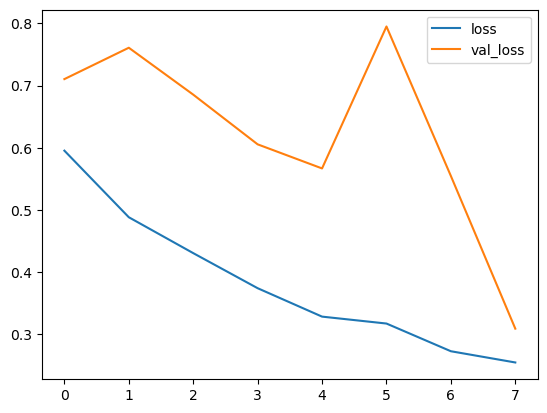

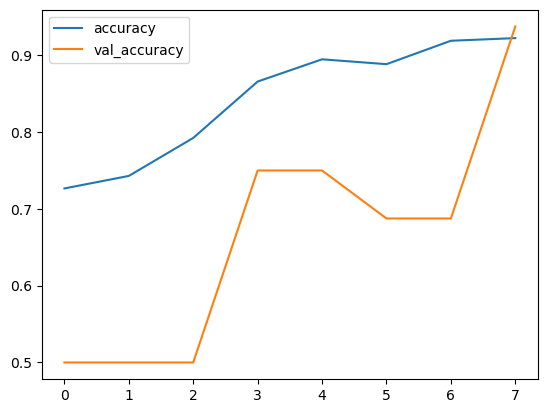

Final training accuracy: 92.23542809486389
Final validation accuracy: 93.75


In [100]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

# Print final training accuracy
print("Final training accuracy: {}".format(history.history['accuracy'][-1]*100 ))

# Print final validation accuracy
print("Final validation accuracy: {}".format(history.history['val_accuracy'][-1] *100 ))

# Model Accuracy

In [101]:
prediction = model.predict(test_ds)
loss, accuracy = model.evaluate(test_ds)
print('The accuracy of the model on test dataset is',np.round(accuracy*100))

20/20 [==============================] - 1s 65ms/step - loss: 0.3883 - accuracy: 0.8608
The accuracy of the model on test dataset is 86.0


# Testing Some Random Image Prediction

1/1 [==============================] - 0s 333ms/step
[0.6901419]
Pneumonia


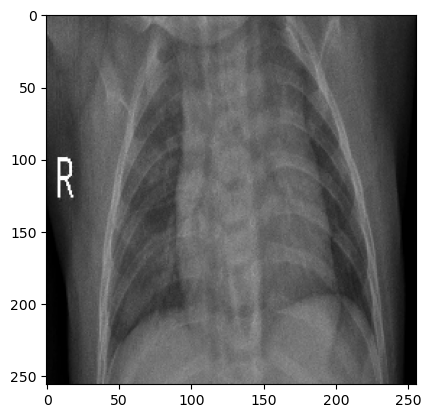

In [103]:
test_image = tf.keras.utils.load_img('./archive/test/NORMAL/IM-0022-0001.jpeg',target_size=(img_height, img_width))

plt.imshow(test_image)
 
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
 
result = model.predict(test_image)
 
class_probabilities = result[0]
 
# Determine the class with the highest probability and print its label
print(class_probabilities)
if class_probabilities[0] <= 0.5:
    print("Normal")
else:
    print("Pneumonia")

1/1 [==============================] - 0s 28ms/step
[0.9153369]
Pneumonia


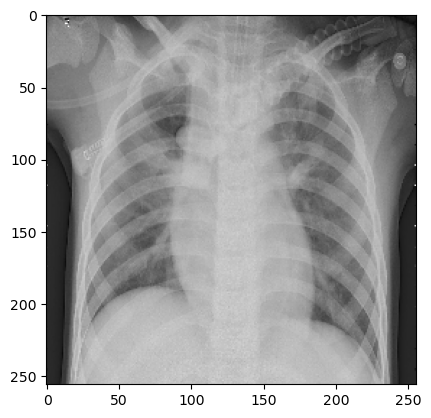

In [115]:
test_image = tf.keras.utils.load_img('./archive/test/PNEUMONIA/person10_virus_35.jpeg',target_size=(img_height, img_width))

plt.imshow(test_image)
 
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
 
result = model.predict(test_image)
 
class_probabilities = result[0]
 
# Determine the class with the highest probability and print its label
print(class_probabilities)
if class_probabilities[0] <= 0.5:
    print("Normal")
else:
    print("Pneumonia")

1/1 [==============================] - 1s 535ms/step
[0.92594796]
Pneumonia


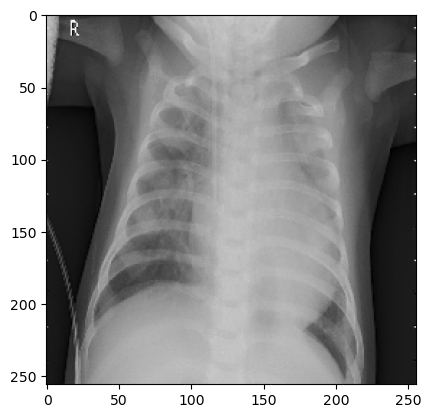

In [106]:
test_image = tf.keras.utils.load_img('./archive/test/PNEUMONIA/person124_bacteria_591.jpeg',target_size=(img_height, img_width))

plt.imshow(test_image)
 
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
 
result = model.predict(test_image)
 
class_probabilities = result[0]
 
# Determine the class with the highest probability and print its label
print(class_probabilities)
if class_probabilities[0] <= 0.5:
    print("Normal")
else:
    print("Pneumonia")

1/1 [==============================] - 0s 33ms/step
[0.9272089]
Pneumonia


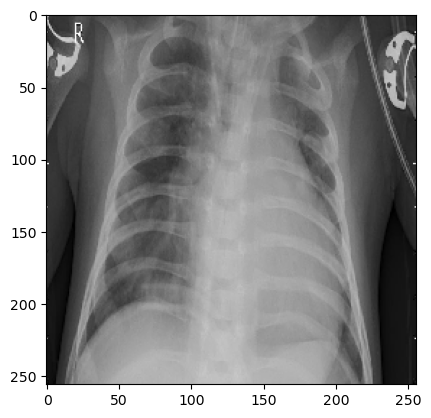

In [107]:
test_image = tf.keras.utils.load_img('./archive/test/PNEUMONIA/person136_bacteria_650.jpeg',target_size=(img_height, img_width))

plt.imshow(test_image)
 
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
 
result = model.predict(test_image)
 
class_probabilities = result[0]
 
# Determine the class with the highest probability and print its label
print(class_probabilities)
if class_probabilities[0] <= 0.5:
    print("Normal")
else:
    print("Pneumonia")

1/1 [==============================] - 0s 29ms/step
[0.9259019]
Pneumonia


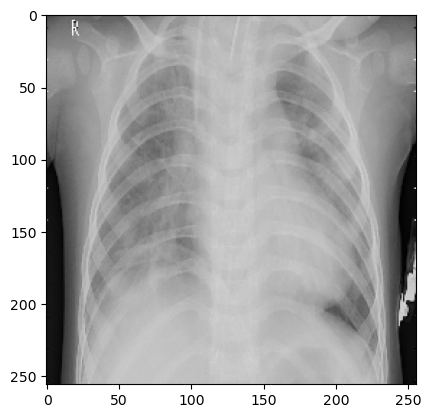

In [108]:
test_image = tf.keras.utils.load_img('./archive/test/PNEUMONIA/person101_bacteria_483.jpeg',target_size=(img_height, img_width))

plt.imshow(test_image)
 
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
 
result = model.predict(test_image)
 
class_probabilities = result[0]
 
# Determine the class with the highest probability and print its label
print(class_probabilities)
if class_probabilities[0] <= 0.5:
    print("Normal")
else:
    print("Pneumonia")

1/1 [==============================] - 0s 29ms/step
[0.29491845]
Normal


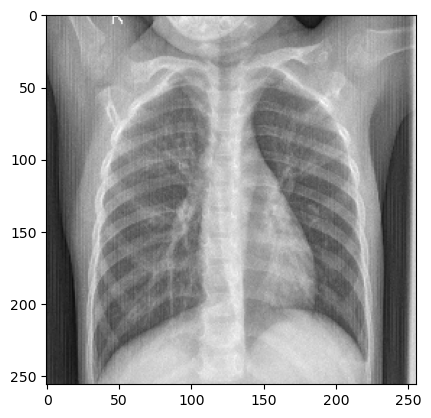

In [109]:
test_image = tf.keras.utils.load_img('./archive/test/NORMAL/IM-0009-0001.jpeg',target_size=(img_height, img_width))

plt.imshow(test_image)
 
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
 
result = model.predict(test_image)
 
class_probabilities = result[0]
 
# Determine the class with the highest probability and print its label
print(class_probabilities)
if class_probabilities[0] <= 0.5:
    print("Normal")
else:
    print("Pneumonia")

1/1 [==============================] - 0s 35ms/step
[0.36733425]
Normal


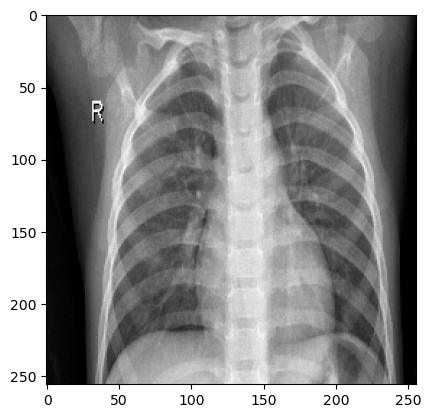

In [110]:
test_image = tf.keras.utils.load_img('./archive/test/NORMAL/IM-0091-0001.jpeg',target_size=(img_height, img_width))

plt.imshow(test_image)
 
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
 
result = model.predict(test_image)
 
class_probabilities = result[0]
 
# Determine the class with the highest probability and print its label
print(class_probabilities)
if class_probabilities[0] <= 0.5:
    print("Normal")
else:
    print("Pneumonia")

1/1 [==============================] - 0s 32ms/step
[0.55366284]
Pneumonia


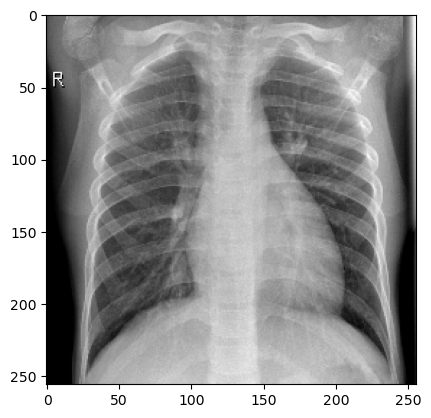

In [111]:
test_image = tf.keras.utils.load_img('./archive/test/NORMAL/NORMAL2-IM-0381-0001.jpeg',target_size=(img_height, img_width))

plt.imshow(test_image)
 
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
 
result = model.predict(test_image)
 
class_probabilities = result[0]
 
# Determine the class with the highest probability and print its label
print(class_probabilities)
if class_probabilities[0] <= 0.5:
    print("Normal")
else:
    print("Pneumonia")